<a href="https://colab.research.google.com/github/vasudev-sharma/Brain-Tumor-Segmentation/blob/master/GridSearch-CustomMetrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
!pip install kaggle

In [101]:
from google.colab import files
files.upload()

Saving archive (6).zip to archive (6).zip


In [104]:
!rm creditcard.csv
!unzip '/content/archive (6).zip'

Archive:  /content/archive (6).zip
  inflating: creditcard.csv          


In [107]:
# read the first 80 K rows
df = pd.read_csv('/content/creditcard.csv')[:80_000]

In [108]:
len(df)

80000

In [109]:
# Fraud Detection - An highly unbalanced dataset

In [110]:
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [111]:
# a data frame object only has drop method()
X = df.drop(columns=['Time', 'Amount', 'Class']).values
y = df['Class'].values
print(X.shape)

(80000, 28)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


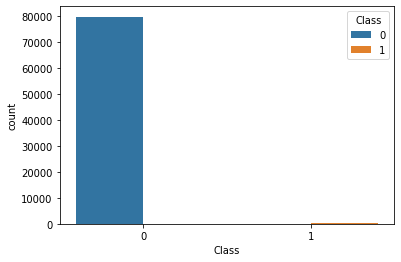

In [112]:
# Countplot to list the fraud cases
sns.countplot('Class', hue='Class', data=df)

In [113]:
# Dataset is very imbalances
# Non-fraud cases
print(f'The NON-fraud cases are {sum(df["Class"] == 0)}')
print(f'The fraud cases are {sum(df["Class"] == 1)}')

The NON-fraud cases are 79804
The fraud cases are 196


In [114]:
# Another method is to use calculate sum is `np.sum()` method
y.sum() # Fraud Cases

196

In [67]:
# `np.ndarray` has no method unique()
np.unique(y)

array([ 0.,  1., nan])

### Logistic Regression

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


model = Pipeline(steps=[('model', LogisticRegression(max_iter=1500))])

In [124]:
model.fit(X, y)

Pipeline(memory=None,
         steps=[('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1500,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [125]:
# See the accuracy is sooo high for the inbalanced dataset
model.score(X, y)

0.9985625

In [126]:
preds = model.predict(X)
print(f'The no of fraud cases are {preds.sum()}')

The no of fraud cases are 151


Let's try to improve the performace of the imbalanced model




1. Use weighted class loss. In Logistic Regression class, it can be done via `class_weight` argument

In [139]:
# Class weights
model = Pipeline(steps=[('model', LogisticRegression(max_iter=1500))])
# Assign more weight to the imbalanced class

model.fit(X, y)

Pipeline(memory=None,
         steps=[('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1500,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [150]:
# See the accuracy is sooo high for the inbalanced dataset
model.score(X, y)

Lets do grid search to optimize the class weights parameter

In [143]:
# hyperparameters can be changed via param_grid value
model_grid_search = GridSearchCV(model, param_grid={'model__class_weight': [{0:1, 1:v} for v in [1, 2, 4, 8] ]}, cv=3)

In [144]:
model_grid_search.fit(X, y)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('model',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=1500,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=None,
                                              

In [147]:
# check the results using `.cv_results_`
pd.DataFrame(model_grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__class_weight,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.031735,0.105576,0.005008,0.000019,"{0: 1, 1: 1}","{'model__class_weight': {0: 1, 1: 1}}",0.998538,0.998913,0.997825,0.998425,0.000451,4
1,1.037272,0.239214,0.004982,0.000014,"{0: 1, 1: 2}","{'model__class_weight': {0: 1, 1: 2}}",0.998500,0.998988,0.998012,0.998500,0.000398,3
2,1.127030,0.284090,0.005037,0.000056,"{0: 1, 1: 4}","{'model__class_weight': {0: 1, 1: 4}}",0.998463,0.999063,0.998312,0.998612,0.000324,2
3,1.067488,0.205533,0.005012,0.000066,"{0: 1, 1: 8}","{'model__class_weight': {0: 1, 1: 8}}",0.998350,0.999138,0.998387,0.998625,0.000363,1


In [132]:
preds = model.predict(X)
print(f'The no of predicted fraud cases are {preds.sum()}')
print(f'The no of true fraud cases are {y.sum()}')

# NOTE : The model performace imporves after applying weighted loss

The no of predicted fraud cases are 171
The no of true fraud cases are 196


NOTE: The accuracy is not the best metric to check the performace of an imbalanced dataset

### Using custom metrics in scikit-learn

In [167]:
# import sklearn metrics
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer
# to use sklearn metrics import make_scorer too

In [157]:
# usage example 
# precision_score(y_pred, y_true)
precision_score(y_true=np.ones((10, 10)).flatten(), y_pred=np.ones((10, 10)).flatten())

1.0

In [163]:
# Compute the precision of the model
print(f'The precision score is {precision_score(y_true=y, y_pred=preds)}')

# Compute the recall of the model
print(f'The recall score is {recall_score(y_true=y, y_pred=preds)}')

# compute the F1 score
print(f'The F1 score is {f1_score(y_true=y, y_pred=preds)}')

The precision score is 0.7953216374269005
The recall score is 0.6938775510204082
The F1 score is 0.7411444141689374


Add these metrics to the grid search via `scoring` argument, `refit` and `make_scorer` function

In [191]:
model_grid_search = GridSearchCV(model, 
                                 param_grid={'model__class_weight': [{0:1, 1:v} for v in np.linspace(1, 20, 30) ]}, 
                                 cv=10,
                                 scoring={'precision': make_scorer(precision_score), 'recall':make_scorer(recall_score), 'f1_score':make_scorer(f1_score)}
                                 , refit='precision',
                                 return_train_score=True
                                 )

# Note: Set the parameter `return_training_score=True` to see the training score too

In [192]:
model_grid_search.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('model',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=1500,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=None,
                                             

In [190]:
# check the results
pd.DataFrame(model_grid_search.cv_results_)

# matplotlib takes pd series, list or np.ndarray as its argument

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_train_precision,split1_train_precision,split2_train_precision,mean_train_precision,std_train_precision,split0_test_recall,split1_test_recall,split2_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_train_recall,split1_train_recall,split2_train_recall,mean_train_recall,std_train_recall,split0_test_f1_score,split1_test_f1_score,split2_test_f1_score,mean_test_f1_score,std_test_f1_score,rank_test_f1_score,split0_train_f1_score,split1_train_f1_score,split2_train_f1_score,mean_train_f1_score,std_train_f1_score
0,1.018277,0.116842,0.046013,0.000340,"{0: 1, 1: 1}","{'model__class_weight': {0: 1, 1: 1}}",0.644444,0.974359,0.733333,0.784046,0.139379,2,0.973913,0.715909,0.803419,0.831080,0.107130,0.892308,0.575758,0.169231,0.545765,0.295956,4,0.854962,0.484615,0.717557,0.685711,0.152861,0.748387,0.723810,0.275000,0.582399,0.217595,4,0.910569,0.577982,0.758065,0.748872,0.135934
1,1.043247,0.262564,0.046160,0.000544,"{0: 1, 1: 2}","{'model__class_weight': {0: 1, 1: 2}}",0.634409,0.975610,0.730769,0.780263,0.143624,3,0.974138,0.710526,0.748148,0.810937,0.116418,0.907692,0.606061,0.292308,0.602020,0.251246,3,0.862595,0.623077,0.770992,0.752222,0.098680,0.746835,0.747664,0.417582,0.637360,0.155407,3,0.914980,0.663934,0.759398,0.779438,0.103464
2,1.069840,0.255582,0.046242,0.000444,"{0: 1, 1: 4}","{'model__class_weight': {0: 1, 1: 4}}",0.627660,0.976744,0.777778,0.794061,0.142978,1,0.957627,0.740157,0.751724,0.816503,0.099902,0.907692,0.636364,0.430769,0.658275,0.195319,2,0.862595,0.723077,0.832061,0.805911,0.059884,0.742138,0.770642,0.554455,0.689079,0.095902,2,0.907631,0.731518,0.789855,0.809668,0.073250
3,1.050423,0.200179,0.046488,0.001293,"{0: 1, 1: 8}","{'model__class_weight': {0: 1, 1: 8}}",0.608247,0.957447,0.775000,0.780231,0.142608,4,0.933884,0.762590,0.753333,0.816603,0.083017,0.907692,0.681818,0.476923,0.688811,0.175930,1,0.862595,0.815385,0.862595,0.846858,0.022255,0.728395,0.796460,0.590476,0.705110,0.085689,1,0.896825,0.788104,0.804270,0.829733,0.047898
